In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

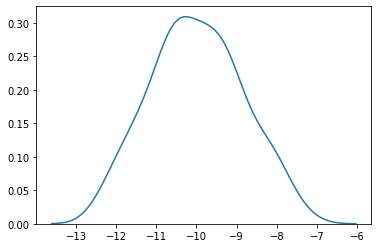

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0587: 100%|██████████| 1500/1500 [00:05<00:00, 283.33it/s]


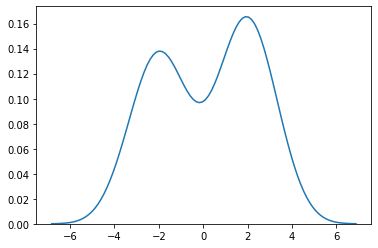

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-0.19311902,  2.568703  , -2.6430948 , -2.3580332 ,
              1.4727714 , -2.7693532 , -2.5207014 , -1.864402  ,
              2.5033712 ,  3.7028718 ,  2.811784  , -1.1921397 ,
             -2.5791812 , -2.1948369 , -0.9657736 , -3.1659644 ,
             -3.1271007 ,  1.9489219 ,  0.93185914, -1.4952912 ,
              1.1473037 ,  2.8079717 ,  0.18494919, -1.695384  ,
              2.9276788 , -3.3739111 ,  0.8855041 ,  1.9959471 ,
              3.459167  ,  1.485349  ,  2.118908  ,  1.0904043 ,
             -4.194233  , -3.2310889 ,  4.254721  ,  2.384281  ,
              2.5731397 , -2.9216986 ,  1.3673713 , -3.6438649 ,
              1.2446152 , -1.0239959 , -1.5838755 ,  2.357768  ,
              1.0568396 ,  2.8080745 , -1.7668661 , -1.3490967 ,
             -1.7923808 , -0.8804681 ,  0.7881378 ,  2.2891932 ,
              1.8425591 ,  1.7779492 ,  0.43250683,  0.62321234,
             -2.7962391 , -2.2784119 , -2.2388415 ,  3.8079813 ,
              1.57762   ,